Jack Lemere
AI Algorithms Project: Diamond Price Predictor

Our goal for this project is to predict the price of diamonds based on its various characteristics. The main variables that determine the price of any given diamond is Carat, Cut, Colour, and Clarity. We will be taking a dataset of diamonds with these variables, and using the variables to predict the price of the diamond. We are also given the price of the diamond with the dataset, meaning that we can use supervised learning. For this model, we will be implementing a Linear Regression model which will use multiple variables, including Carat, Cut, Colour, and Clarity to predict the prices of the diamonds. Here we can see a list of the variables given, along with the unique values in each given column:


price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (3.73--10.74)

y width in mm (3.68--58.9)

z depth in mm (1.07--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

First we will import the dataset and drop any columns we do not need

In [3]:
diamonds_df_raw = pd.read_csv("diamonds.csv")

In [4]:
diamonds_df_raw

,ID,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
diamonds_df = diamonds_df_raw.drop(['ID'], axis=1)

# EDA

In [6]:
diamonds_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Here we see that there are some 0 values in some columns, we will remove these datapoints

In [8]:
df = diamonds_df[(diamonds_df['z'] != 0.0) & (diamonds_df['y'] != 0.0) & (diamonds_df['x'] != 0.0)]

In [9]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


We will create seperate datasets for each column we will be using and alnalyse them all seperately.

In [10]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [11]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [12]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [13]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


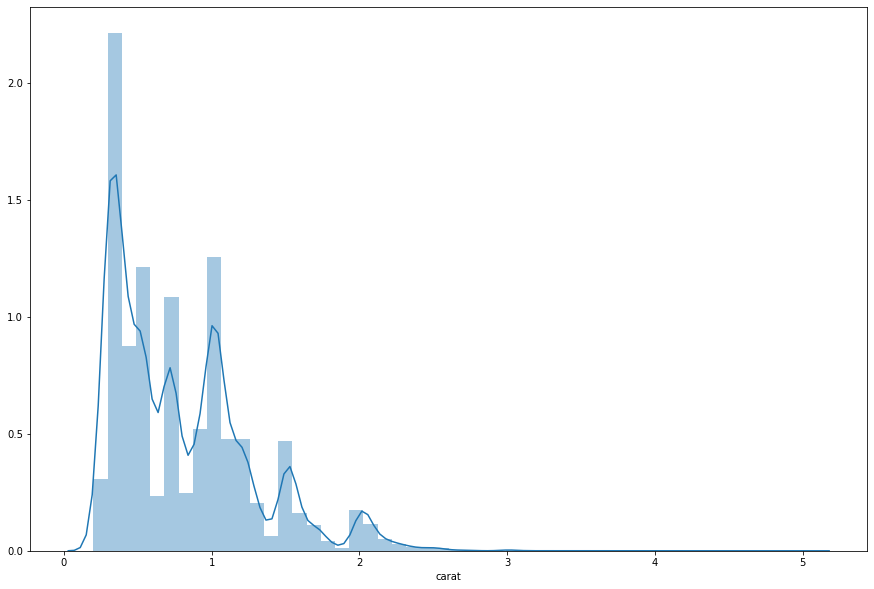

In [14]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['carat'])

Here we can see that most of the diamonds we are dealing with have carat values of around 0.2-1

In [15]:
samp = df.sample(n=1000)

In [16]:
samp

,carat,cut,color,clarity,depth,table,price,x,y,z
36761,0.51,Very Good,I,SI2,61.2,56.0,956,5.12,5.14,3.14
43041,0.50,Very Good,E,SI1,63.5,61.0,1374,5.03,4.98,3.18
46192,0.52,Premium,D,VS2,62.4,58.0,1749,5.09,5.13,3.19
12388,0.28,Ideal,F,VS1,60.2,56.0,598,4.30,4.31,2.59
22513,1.50,Very Good,I,VVS2,59.7,60.0,10551,7.46,7.62,4.50
...,...,...,...,...,...,...,...,...,...,...
14016,1.01,Good,G,VS2,63.7,56.0,5701,6.40,6.32,4.05
11870,1.26,Premium,J,VS2,62.5,58.0,5107,6.92,6.90,4.32
35040,0.40,Ideal,G,VVS2,61.4,53.0,883,4.73,4.81,2.93
12042,0.40,Good,I,SI1,63.2,54.0,596,4.67,4.69,2.96


Our dataset has many usable datapoints, which is great. However, trying to examine all of this data at the same time would be challanging as plotting so many datapoints would make our plots messy and difficult to read. For this reason, we will take a random sample of around 500 datapoints. This way we will have enough data to capture what trends exist while not overloading our visualizations with excess datapoints.

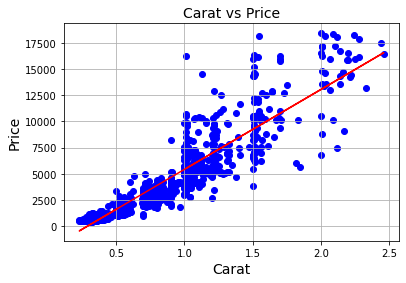

In [17]:
import matplotlib.pyplot as plt
x = samp['carat']
y = samp['price']
plt.scatter(x, y, color='b')
plt.title('Carat vs Price', fontsize=14)
plt.xlabel('Carat', fontsize=14)
plt.ylabel('Price', fontsize=14)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r")
plt.grid(True)
plt.show()

Here we can see a trend regarding carat (mass) where the more carats the diamond has, the higher its value. This is expected, and will be valuable information for our model.

In [18]:
F_cut = df[df['cut'] == 'Fair']
G_cut = df[df['cut'] == 'Good']
VG_cut = df[df['cut'] == 'Very Good']
P_cut = df[df['cut'] == 'Premium']
I_cut = df[df['cut'] == 'Ideal']

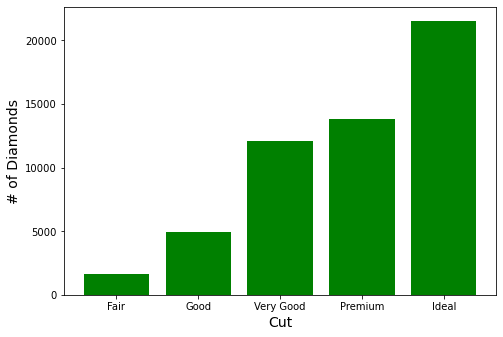

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cuts = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
cut_tot = [F_cut.shape[0], G_cut.shape[0], VG_cut.shape[0], P_cut.shape[0], I_cut.shape[0]]
ax.bar(cuts,cut_tot, color='g')
plt.xlabel('Cut', fontsize=14)
plt.ylabel('# of Diamonds', fontsize=14)
plt.show()

Most of the diamonds in this dataset have 'Ideal' cut.

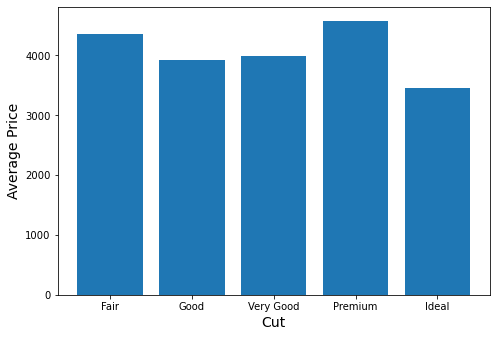

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cuts = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
cut_avg = [F_cut['price'].mean(), G_cut['price'].mean(), VG_cut['price'].mean(), P_cut['price'].mean(), I_cut['price'].mean()]
ax.bar(cuts,cut_avg)
plt.xlabel('Cut', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.show()

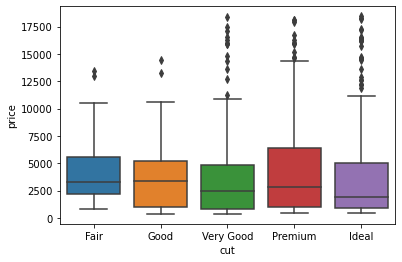

In [22]:
cut_box = sns.boxplot(x="cut", y="price", order = ["Fair", "Good", "Very Good", "Premium", "Ideal"], data=samp)

Here we see in this boxplot that generally, the higher quality of cut the diamond has, the greater the price of the diamond is. This is also expected.

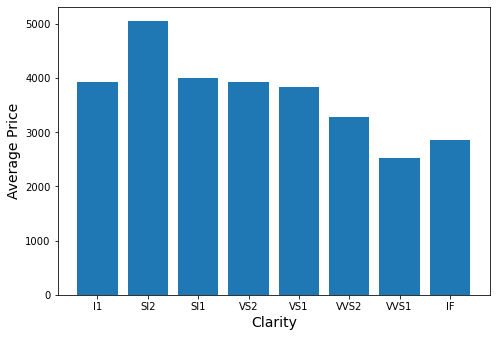

In [23]:
I1 = df[df['clarity'] == 'I1']
SI2 = df[df['clarity'] == 'SI2']
SI1 = df[df['clarity'] == 'SI1']
VS2 = df[df['clarity'] == 'VS2']
VS1 = df[df['clarity'] == 'VS1']
VVS2 = df[df['clarity'] == 'VVS2']
VVS1 = df[df['clarity'] == 'VVS1']
IF = df[df['clarity'] == 'IF']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clars = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cl_avg = [I1['price'].mean(), SI2['price'].mean(), SI1['price'].mean(), VS2['price'].mean(), VS1['price'].mean(), VVS2['price'].mean(), VVS1['price'].mean(), IF['price'].mean()]
ax.bar(clars,cl_avg)
plt.xlabel('Clarity', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.show()

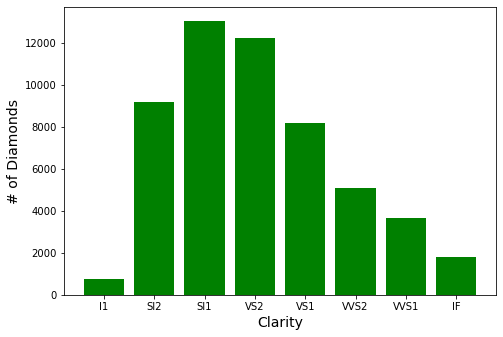

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clars = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
cl_tot = [I1.shape[0], SI2.shape[0], SI1.shape[0], VS2.shape[0], VS1.shape[0], VVS2.shape[0], VVS1.shape[0], IF.shape[0]]
ax.bar(clars,cl_tot,color='g')
plt.xlabel('Clarity', fontsize=14)
plt.ylabel('# of Diamonds', fontsize=14)
plt.show()

Most of the diamonds in this dataset have mid-range clarity.

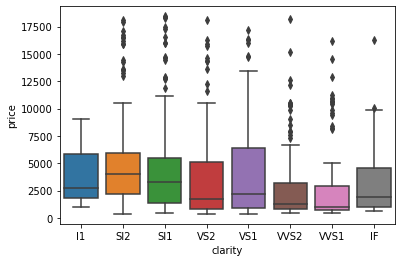

In [25]:
clarity_box = sns.boxplot(x="clarity", y="price", order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], data=samp)

With this boxplot, we can see that diamond clarity quality seems to not have any noticable relationship with price. This does not mean it has no influence, but it is likely the case that features such as carat likely have more influence on price than clarity.

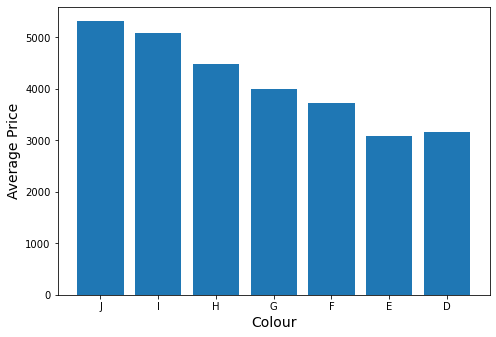

In [26]:
D = df[df['color'] == 'D']
E = df[df['color'] == 'E']
F = df[df['color'] == 'F']
G = df[df['color'] == 'G']
H = df[df['color'] == 'H']
I = df[df['color'] == 'I']
J = df[df['color'] == 'J']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
colors = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
col_avg = [J['price'].mean(), I['price'].mean(), H['price'].mean(), G['price'].mean(), F['price'].mean(), E['price'].mean(), D['price'].mean()]
ax.bar(colors,col_avg)
plt.xlabel('Colour', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.show()

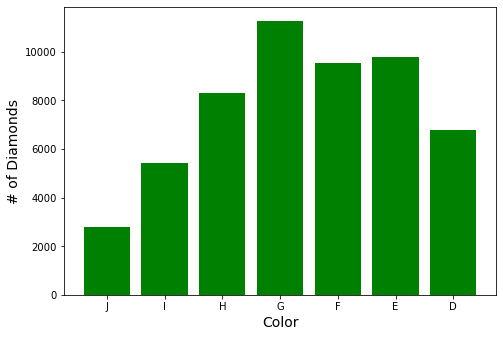

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
colors = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
col_avg = [J.shape[0], I.shape[0], H.shape[0], G.shape[0], F.shape[0], E.shape[0], D.shape[0]]
ax.bar(colors,col_avg,color='g')
plt.xlabel('Color', fontsize=14)
plt.ylabel('# of Diamonds', fontsize=14)
plt.show()

Most of the diamonds in this dataset have mid-range colour.

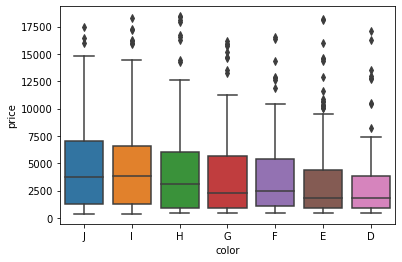

In [28]:
color_box = sns.boxplot(x="color", y="price", order = ['J', 'I', 'H', 'G', 'F', 'E', 'D'], data=samp)

Here it appears that the colour quality of the diamond has little influence on price. It could be said based on the data in this sample that a diamond with high quality colour may actually be more likely to have a lower price than a diamond with low colour quality. This is likely to do with the sample we chose.

# Multiple Regression

As we are trying to predict the value of something dependent on variables, and that the only non-categorical data point has a linear trend with price, it seems a linear regression algorithm should be an obvious choice of model for this problem. As we have multiple variables influencing price, we will be using multiple regression; an extension of linear regression that utilizes multiple dependent variables.

The first step of the model will be to convert the categorical data into a usable form. Rather than represent each grade of cut, colour, and clarity with a string variable, we will convert this to numerical. This will be done rather simply by replacing the ranking ranking system into numerical ranking. For cut, the ranking will be 1-5 with 1 being worst and 5 being best, 1-7 with 1 being worst and 7 being best for colour, and 1-8 with 1 being worst and 8 being best for clarity.

In [29]:
df_new = df.replace({'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1})
df_new = df_new.replace({'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1})
df_new = df_new.replace({'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2': 2, 'I1': 1})

In [30]:
df_new

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


We will now create datasets of dependent variables and independent variables

In [31]:
X = df_new[['carat','cut','color','clarity']].values.reshape(-1,4)
y = df_new['price'].values.reshape(-1,1)

Now we will split our data into training and testing datasets, and train the model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [35]:
print(regressor.coef_)
print(regressor.intercept_)

[[8764.77730565  156.95500933  319.28766407  519.87372238]]
[-7192.26732113]


In [36]:
y_pred = regressor.predict(X_test)

In [37]:
df_pred = pd.DataFrame({'Actual Price': y_test.flatten(), 'Predicted Price': y_pred.flatten()})
df_pred

,Actual Price,Predicted Price
0,6099,7303.230649
1,923,655.400656
2,4276,4523.542828
3,854,361.403505
4,8008,7278.929390
...,...,...
10779,5656,5275.442116
10780,1235,2189.980907
10781,1753,2032.474513
10782,13189,10565.226253


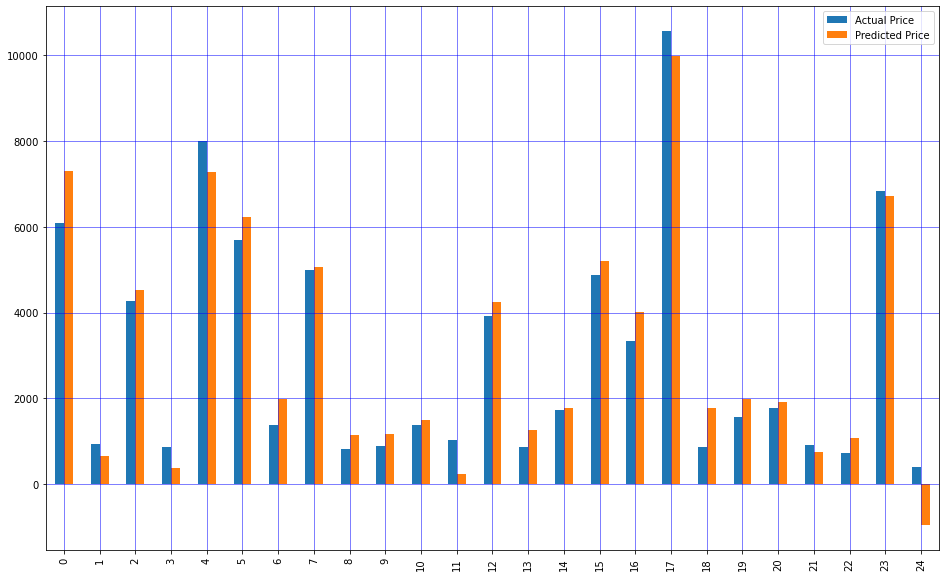

In [38]:
df1 = df_pred.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='orange')
plt.show()

Here we can see that the actual price and predicted price generally reflect one another in this sample. However, a slight problem can be seen at the last datapoint on this graph, showing that our model predicted a negative price for that diamond.

In [40]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

To test our error, we will use mean absolute percentage error (MAPE). For our purposes, this is better than mean-absolute error (MAE) as we are dealing with extremely varying prices. A difference of 500 dollars would be very accurate for a diamond worth 100,000 dollars but very poor for a diamond worth 300 dollars. For this reason, we will use MAPE.

In [41]:
print('R-squared (R2):', r2_score(y_test, y_pred))
print('Mean Absolute Percentage Error:', MAPE(y_test, y_pred)) 

R-squared (R2): 0.9033114879111446
Mean Absolute Percentage Error: 48.59915443888623


Overall we can see that we have an R-squared value of 0.90(good) and a MAPE of 48.6%, meaning that on average the prediction is within 48.6% of the actual price, which could be better but is not terrible.

In [42]:
print('Diamond Value: $', "%.2f" % float(regressor.predict([[2,4,4,4]])[0][0]))

Diamond Value: $ 14321.75


We will now convert our algorithm to a pickle file which we will use in the software pipeline to host our algorithm for public use.

In [43]:
pickle.dump(regressor, open('model.pkl', 'wb'))

In [44]:
model = pickle.load(open('model.pkl', 'rb'))

In [45]:
model

LinearRegression()